In [88]:
import numpy as np
import pandas as pd
import robosuite as suite
from robosuite.controllers import load_controller_config
from robosuite.utils.placement_samplers import UniformRandomSampler

In [43]:
env = suite.make(
    env_name="Stack", # try with other tasks like "Stack" and "Door"
    robots="Sawyer",  # try with other robots like "Sawyer" and "Jaco"
    has_renderer=True,  # can set to false for training
    # controller_configs=controller_config,
    render_camera="frontview",
    has_offscreen_renderer=True,
    use_object_obs=True,
    use_camera_obs=True,
    camera_names="agentview",
    camera_heights=64,
    camera_widths=64
)

In [109]:
# reset the environment
env.reset()
imgs = []
observations = []
actions = []
rewards = []
for i in range(600):
    print(f"i: {i+1}/600", end="\r")
    action = np.random.randn(8) # sample random action
    actions.append(action)
    obs, reward, done, info = env.step(action)  # take action in the environment
    imgs.append(obs["agentview_image"])
    obs.pop("agentview_image", "")
    observations.append(obs)
    rewards.append(reward)
    # print(reward)
    

In [55]:
j = imgs[0]

In [56]:
k = imgs[0]

In [57]:
(j == k).sum()

12288

In [58]:
j = j.flatten()
j = j.reshape(64,64,3)

In [59]:
(j == k).sum()

12288

In [89]:
df_obs = pd.DataFrame()
df_imgs = pd.DataFrame()

In [97]:
sample_obs = observations[0]
state_dims = {key: sample_obs[key].shape for key in sample_obs.keys()}

observations_flatten = [np.concatenate([obs[k] for k in state_dims]) for obs in observations]
imgs_flatten = [img.flatten() for img in imgs]

df_actions = pd.DataFrame(actions)
df_obs_trajectory = pd.DataFrame(observations_flatten)
df_obs_trajectory = pd.concat([df_obs_trajectory, df_actions], axis=1)
df_obs_trajectory["rewards"] = rewards
df_obs_trajectory["trajectory_id"] = 
df_imgs_trajectory = pd.DataFrame(imgs_flatten)
df_imgs_trajectory = pd.concat([df_imgs_trajectory, df_actions], axis=1)
df_imgs_trajectory["rewards"] = rewards
df_imgs_trajectory["trajectory_id"] = 

df_obs = pd.concat([df_obs, df_obs_trajectory], axis=0)
df_imgs = pd.concat([df_imgs, df_imgs_trajectory], axis=0)

In [98]:
actions_df = pd.DataFrame(actions)

In [111]:
l = env.reset()

In [113]:
l.keys()

odict_keys(['robot0_joint_pos_cos', 'robot0_joint_pos_sin', 'robot0_joint_vel', 'robot0_eef_pos', 'robot0_eef_quat', 'robot0_gripper_qpos', 'robot0_gripper_qvel', 'agentview_image', 'cubeA_pos', 'cubeA_quat', 'cubeB_pos', 'cubeB_quat', 'gripper_to_cubeA', 'gripper_to_cubeB', 'cubeA_to_cubeB', 'robot0_proprio-state', 'object-state'])

In [101]:
actions_df.columns = [f"a_{i}" for i in range(actions_df.shape[1])]

In [108]:
pd.concat([df_obs_trajectory, actions_df], axis=1)

(600, 118)

In [102]:
actions_df

,a_0,a_1,a_2,a_3,a_4,a_5,a_6,a_7
0,0.059925,1.209666,-0.473401,-0.118692,1.613987,-0.276385,0.094057,-1.307758
1,0.335512,-0.250625,-0.183301,0.816143,0.683491,0.639478,-1.444258,-0.145904
2,-0.969340,-0.130087,0.262630,-0.556751,1.088770,1.937205,-1.884703,1.220683
3,1.605825,-0.241532,-1.828971,0.845921,0.173258,0.794198,1.255562,-0.628589
4,0.809574,0.373893,-0.609250,2.085085,-0.679961,-0.165316,1.623559,0.680750
...,...,...,...,...,...,...,...,...
595,0.854345,1.566736,0.965977,0.621369,-1.125431,0.990482,-0.716988,-0.259362
596,0.191724,-1.419421,-2.449507,-0.820949,-0.347160,0.162394,0.968212,-0.466289
597,1.409548,1.307066,0.693465,0.537546,-1.637406,-0.578489,0.286084,0.928351
598,0.644862,1.383960,0.656969,1.098774,-1.728218,-0.171786,-0.419855,-0.557478


In [92]:
actions_flatten = [action.flatten() for action in actions]

In [86]:
df2 = pd.DataFrame(observations_flatten)

In [87]:
pd.concat([df, df2])

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,0.999426,0.393532,0.999999,-0.549790,0.999976,0.832864,0.017532,-0.033865,-0.919311,-0.001349,...,0.201323,0.096999,-0.209621,-0.202136,0.034292,-0.168773,-0.197136,-0.062707,0.040848,0.005
1,0.999435,0.394295,0.999999,-0.548539,0.999977,0.832757,0.018149,-0.033615,-0.918984,-0.001626,...,0.201323,0.096397,-0.209597,-0.203282,0.033690,-0.168748,-0.198282,-0.062707,0.040848,0.005
2,0.999463,0.396460,0.999998,-0.547751,0.999974,0.832569,0.018884,-0.032776,-0.918052,-0.002059,...,0.201323,0.096491,-0.209814,-0.201372,0.033784,-0.168966,-0.196372,-0.062707,0.040848,0.005
3,0.999489,0.399756,0.999996,-0.546756,0.999972,0.832414,0.018999,-0.031959,-0.916622,-0.002680,...,0.201323,0.096754,-0.210018,-0.199697,0.034046,-0.169169,-0.194697,-0.062707,0.040848,0.005
4,0.999514,0.403567,0.999989,-0.544458,0.999969,0.832057,0.018949,-0.031173,-0.914950,-0.004695,...,0.201323,0.096387,-0.209557,-0.198484,0.033680,-0.168708,-0.193484,-0.062707,0.040848,0.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.976291,0.148032,0.965468,0.258486,0.995327,0.719703,0.050677,0.216461,-0.988983,0.260523,...,0.201323,-0.062639,-0.542774,-0.718375,-0.125346,-0.501925,-0.713375,-0.062707,0.040848,0.005
596,0.977282,0.151786,0.965419,0.256037,0.995326,0.719341,0.050889,0.211942,-0.988413,0.260704,...,0.201323,-0.065646,-0.540186,-0.714341,-0.128354,-0.499338,-0.709341,-0.062707,0.040848,0.005
597,0.978334,0.154819,0.965428,0.254775,0.995310,0.718409,0.051031,0.207034,-0.987943,0.260671,...,0.201323,-0.068609,-0.537147,-0.711365,-0.131316,-0.496299,-0.706365,-0.062707,0.040848,0.005
598,0.979516,0.158164,0.965443,0.254773,0.995288,0.716963,0.051249,0.201368,-0.987413,0.260613,...,0.201323,-0.072001,-0.533632,-0.708860,-0.134708,-0.492783,-0.703860,-0.062707,0.040848,0.005


In [62]:

test_df = pd.DataFrame(observations)

In [64]:
test_df.to_csv("te.csv", header=False, index=False)

In [65]:
test_df = pd.read_csv("te.csv")

In [49]:
state_dims

{'robot0_joint_pos_cos': (7,),
 'robot0_joint_pos_sin': (7,),
 'robot0_joint_vel': (7,),
 'robot0_eef_pos': (3,),
 'robot0_eef_quat': (4,),
 'robot0_gripper_qpos': (2,),
 'robot0_gripper_qvel': (2,),
 'cubeA_pos': (3,),
 'cubeA_quat': (4,),
 'cubeB_pos': (3,),
 'cubeB_quat': (4,),
 'gripper_to_cubeA': (3,),
 'gripper_to_cubeB': (3,),
 'cubeA_to_cubeB': (3,),
 'robot0_proprio-state': (32,),
 'object-state': (23,)}

In [36]:
list(k.keys())

['robot0_joint_pos_cos',
 'robot0_joint_pos_sin',
 'robot0_joint_vel',
 'robot0_eef_pos',
 'robot0_eef_quat',
 'robot0_gripper_qpos',
 'robot0_gripper_qvel',
 'agentview_image',
 'cubeA_pos',
 'cubeA_quat',
 'cubeB_pos',
 'cubeB_quat',
 'gripper_to_cubeA',
 'gripper_to_cubeB',
 'cubeA_to_cubeB',
 'robot0_proprio-state',
 'object-state']

In [31]:
l = k["agentview_image"]

In [32]:
j = l

In [33]:
l = l.flatten()

In [34]:
l = l.reshape(84, 84, 3)

In [35]:
(j == l).sum()

21168

In [3]:
controller_config = load_controller_config(default_controller="OSC_POSE")

# create environment instance
env = suite.make(
    env_name="Stack", # try with other tasks like "Stack" and "Door"
    robots="Sawyer",  # try with other robots like "Sawyer" and "Jaco"
    has_renderer=True,  # can set to false for training
    # controller_configs=controller_config,
    render_camera="frontview",
    has_offscreen_renderer=True,
    use_object_obs=True,
    use_camera_obs=True,
    camera_names="agentview",
    camera_heights=84,
    camera_widths=84
)

# reset the environment
env.reset()
imgs = []
for i in range(1000):
    action = np.random.randn(8) # sample random action
    obs, reward, done, info = env.step(action)  # take action in the environment
    # print(reward)
    # imgs.append(obs["agentview_image"])
    # if i == 29:
    #     break
    env.render()  # render on display

KeyboardInterrupt: 

In [66]:
env.robots[0].action_dim

8

In [47]:
print(f"Action dimension={env.robots[0].action_dim}")
print(f"Action value (LB/UB)={env.robots[0].action_limits}")

Action dimension=8
Action value (LB/UB)=(array([-1., -1., -1., -1., -1., -1., -1., -1.]), array([1., 1., 1., 1., 1., 1., 1., 1.]))


In [50]:
env.robots[0].control

<bound method SingleArm.control of <robosuite.robots.single_arm.SingleArm object at 0x15e5a8a00>>

In [46]:
env.robots[0].action_limits[1]

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [33]:
obs.keys()


odict_keys(['robot0_joint_pos_cos', 'robot0_joint_pos_sin', 'robot0_joint_vel', 'robot0_eef_pos', 'robot0_eef_quat', 'robot0_gripper_qpos', 'robot0_gripper_qvel', 'agentview_image', 'cubeA_pos', 'cubeA_quat', 'cubeB_pos', 'cubeB_quat', 'gripper_to_cubeA', 'gripper_to_cubeB', 'cubeA_to_cubeB', 'robot0_proprio-state', 'object-state'])

In [88]:
obs["cubeA_pos"]

array([-0.07333178,  0.04182706,  0.81978449])

In [89]:
obs["cubeB_pos"] # green

array([-0.02626404, -0.0518512 ,  0.82478449])

In [58]:
obs["cubeA_pos"]

array([0.06356447, 0.00408205, 0.81978449])

In [34]:
obs["agentview_image"].shape

(84, 84, 3)

<Figure size 640x480 with 0 Axes>

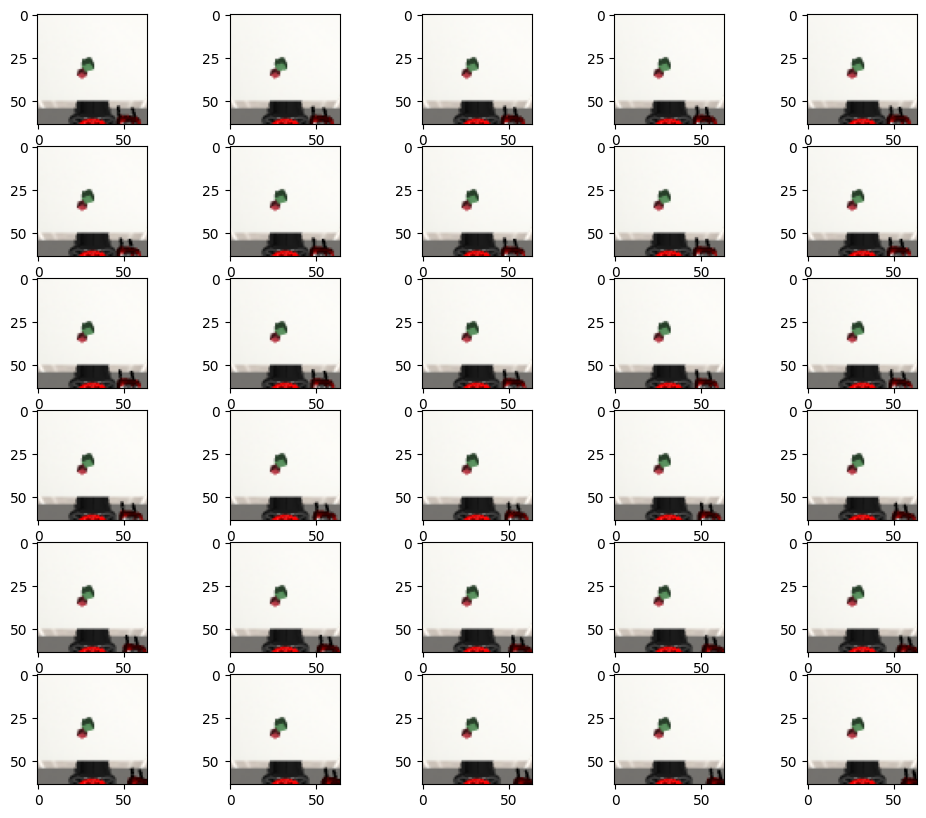

In [45]:
import matplotlib.pyplot as plt
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(6,5, figsize=(12, 10))

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
for i in range(len(imgs)):
    axarr[(i // 5, i % 5)].imshow(imgs[i])